In [9]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

features: tensor([-0.2720,  1.3398]) 
label: tensor([-0.9015])


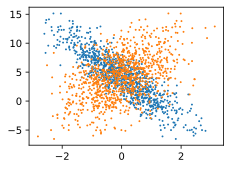

In [10]:
## 生成数据集
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w))) # 生成一个形状为(num_examples, len(w))的矩阵X，其中的元素是均值为0、标准差为1的正态分布随机数
    y = torch.matmul(X, w) + b # 对特征矩阵X和权重向量w进行矩阵乘法，然后加上偏置b
    y += torch.normal(0, 0.01, y.shape) #给模型输出y添加了随机噪声。噪声是从一个均值为0、标准差为0.01的正态分布中生成的，其形状与y相同
    return X, y.reshape((-1, 1)) #这一行返回了特征矩阵X和经过重塑为列向量的目标向量y。y.reshape((-1, 1))将y重塑为一个列向量，其中-1表示自动计算该维度的大小，以保证总元素数量不变。

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000) # 在机器学习和数据科学中，"标签"（labels）一词通常指的是数据集中每个样本的真实值或目标值，而不是预测值
# 打印每个的第一个张量
print('features:', features[0],'\nlabel:', labels[0]) 

#其中x轴代表features的第二个特征值，y轴代表对应的labels值。
# 这种图表可以帮助我们直观地看到这两者之间是否存在某种关系，例如线性关系、非线性关系或没有明显关系。
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);
d2l.set_figsize()
d2l.plt.scatter(features[:, (0)].detach().numpy(), labels.detach().numpy(), 1);

In [11]:
## 读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices) #函数随机打乱索引列表，以确保数据批次的随机性，这有助于模型的泛化能力。
    #开始一个循环，从0开始，到num_examples结束，步长为batch_size。这个循环用于逐批次地处理数据。
    for i in range(0, num_examples, batch_size): 
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [12]:
## 效率低下的遍历，因为需要读取到内存并大量的随机访问
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0147, -0.6926],
        [-1.2277, -0.4479],
        [-1.9961,  1.2988],
        [-0.9290,  0.0440],
        [ 0.0258, -0.7756],
        [ 1.3058, -1.0048],
        [-0.6275, -1.7455],
        [-0.0392, -0.8712],
        [-0.1772,  1.4858],
        [-0.5010, -1.7664]]) 
 tensor([[ 6.5237],
        [ 3.2640],
        [-4.2210],
        [ 2.1858],
        [ 6.8682],
        [10.2348],
        [ 8.8728],
        [ 7.0966],
        [-1.1991],
        [ 9.2036]])


In [13]:
'''
在深度学习模型中，权重通常被初始化为符合某种分布（如正态分布）的随机值，这种做法有几个重要的原因：

### 1. 破坏对称性
如果所有权重初始值都相同（比如都是0），模型中的所有神经元将按照完全相同的方式更新，这导致模型无法有效学习。使用随机初始化可以破坏神经网络的对称性，确保每个神经元可以开始学习其独特的特征。

### 2. 促进快速收敛
通过从正态分布中随机选择权重，可以确保权重的初始值既不太大也不太小。过大或过小的权重值可能导致网络输出过大或过小，进而导致梯度消失或梯度爆炸，这会使得网络难以训练。适当的初始化有助于梯度更稳定，从而使模型训练更快收敛。

### 3. 避免初始权重过大或过小
使用正态分布（或其他分布，如均匀分布）确保权重在一个合理的范围内。过大的初始权重可能使激活函数的输出饱和，导致梯度消失问题，而过小的初始权重可能导致信号过弱，也影响学习效率。

### 4. 支持假设的有效性
在一些情况下，特别是当不知道数据分布时，假设权重遵循正态分布（或其他特定分布）可以作为一种合理的起点。这种假设基于中心极限定理，即大量独立随机变量的和趋于正态分布，尽管实际数据分布可能与此不同。

### 5. 实践中的经验
经验表明，从正态分布（或类似分布）中随机初始化权重，对于许多问题来说，是一个有效的起点。此外，深度学习领域的研究人员和实践者还开发了更先进的权重初始化方法（如He初始化、Xavier/Glorot初始化），这些方法考虑了输入和输出神经元数量来进一步优化初始化过程，它们通常也基于特定的概率分布。

总之，选择合适的初始权重分布是确保深度学习模型有效训练的关键步骤之一。正态分布是一个常用的选择，因为它支持模型的快速收敛并有助于防止训练初期的梯度问题。
'''

''

In [14]:
## 初始化模型参数
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [15]:
## 定义模型
def linreg(X, w, b): #@save
  """线性回归模型"""
  return torch.matmul(X, w) + b # 矩阵乘法

In [16]:
## 定义损失函数
def squared_loss(y_hat, y): #@save
  """均方损失"""
  return (y_hat - y.reshape(y_hat.shape))**2/2

In [18]:
## 定义优化算法：小批量随机梯度下降
# 在自动计算梯度之后，手动应用这些梯度来更新参数，并且确保在更新参数时不计算这些操作的梯度，因为更新参数的操作本身不需要被梯度跟踪。
def sgd(params, lr, batch_size): #@save
  # params（网络参数列表），lr（学习率），batch_size（批量大小，每个小批量的样本数）
  # 网络参数主要包括权重（weights）和偏置（biases），它们定义了网络中每个神经元（或节点）的输入与输出之间的数学关系。
  """小批量随机梯度下降"""
  # 使用torch.no_grad()上下文管理器来暂时禁用梯度计算。这是因为在更新参数时不需要计算梯度，这样做可以减少计算量并节省内存
  # 告诉PyTorch在该语句块下执行的操作不需要计算梯度，即不会在反向传播中使用这些操作。这对于优化更新参数时是必要的，因为我们只想直接修改参数值，而不需要计算这些修改操作的梯度。
  # 梯度是由PyTorch自动计算的
  with torch.no_grad():
    for param in params:
      # param = param - (lr * param.grad / batch_size)
      # 计算梯度的平均值（通过梯度除以批量大小），然后用这个平均梯度乘以学习率得到更新步长，最后从当前参数值中减去这个步长，从而更新参数。
      # 这种更新机制有助于平滑梯度的波动，提高优化的稳定性。
      # 通常，损失是在一个批量的数据上计算得到的，这个批量包含多个数据样本。有两种常见的计算批量损失的方法：累加（求和）和平均。
      # 因为梯度的规模随着批量大小的增加而线性增加，所以需要除以batch_size
      param -= lr * param.grad / batch_size 
      # 将参数的梯度重置为0。这是因为在PyTorch中，梯度是累积计算的，即在每次反向传播时，计算得到的梯度会加到参数的.grad属性上。
      # 因此，如果不手动清零，下一次梯度计算时，新的梯度值会和旧的梯度值累加，导致错误的更新。
      # 重置梯度是为了确保每一次参数更新只对当前批量的数据计算得到的梯度做出反应。
      param.grad.zero()